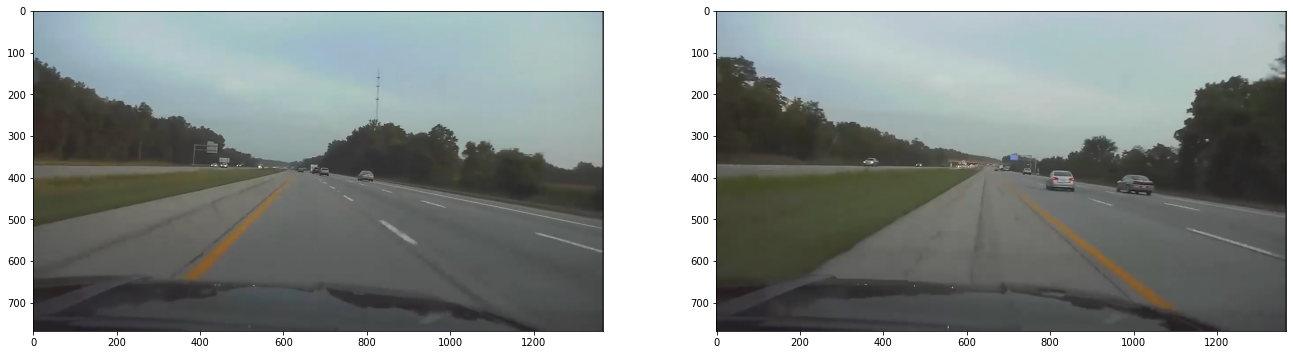

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('7.jpeg')
image2 = cv2.imread('8.jpeg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(1,2,1),plt.imshow(image)
plt.subplot(1,2,2),plt.imshow(image2)
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)


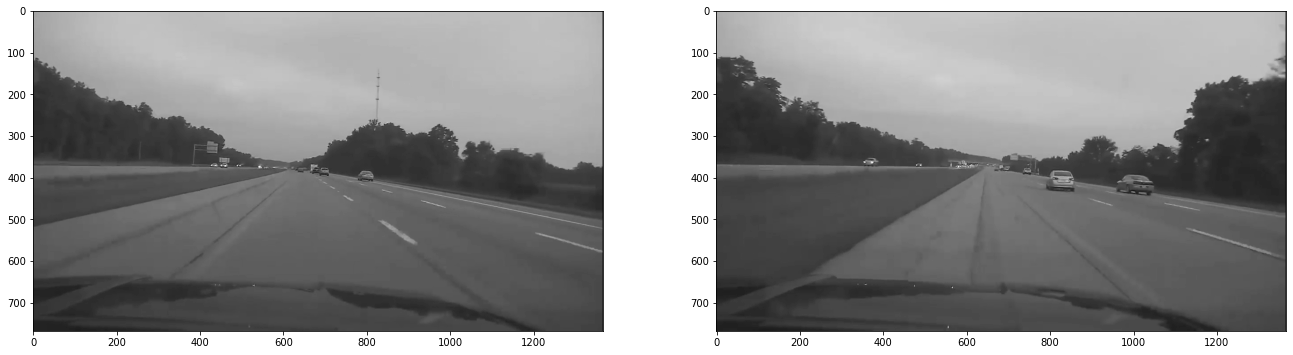

In [2]:
lane_image = np.copy(image)
lane_image2 = np.copy(image2)

gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(lane_image2, cv2.COLOR_RGB2GRAY)

plt.figure(2)
plt.subplot(1,2,1),plt.imshow(gray,'gray')
plt.subplot(1,2,2),plt.imshow(gray2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

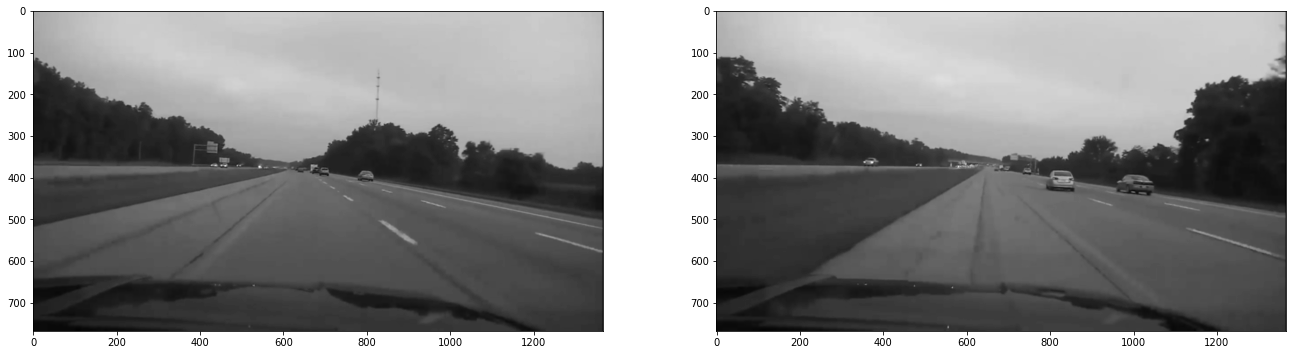

In [3]:
n=5
blur = cv2.GaussianBlur(gray, (n,n), 0)            
blur2 = cv2.GaussianBlur(gray2, (n,n), 0)

plt.figure(3)
plt.subplot(1,2,1),plt.imshow(blur,'gray')
plt.subplot(1,2,2),plt.imshow(blur2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

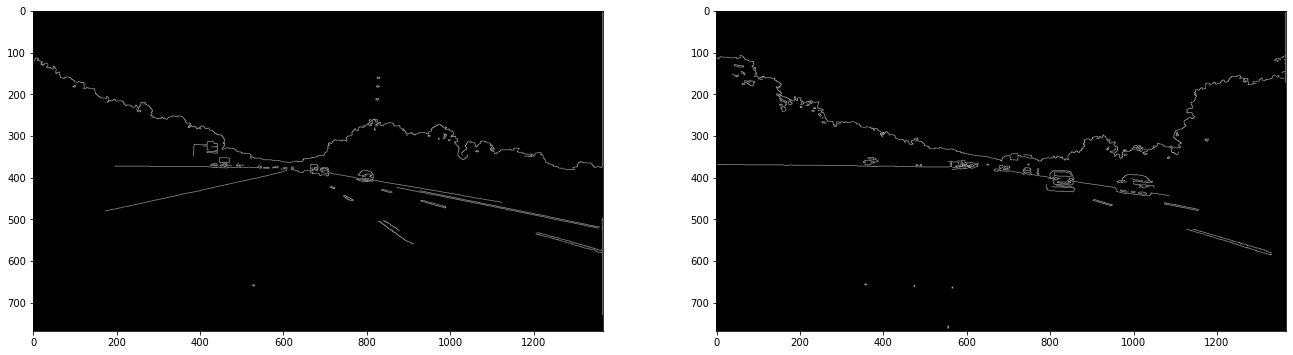

In [4]:
canny = cv2.Canny(blur, 80, 160)
canny2 = cv2.Canny(blur2, 80, 160)

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(canny,'gray')
plt.subplot(1,2,2),plt.imshow(canny2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

768
768


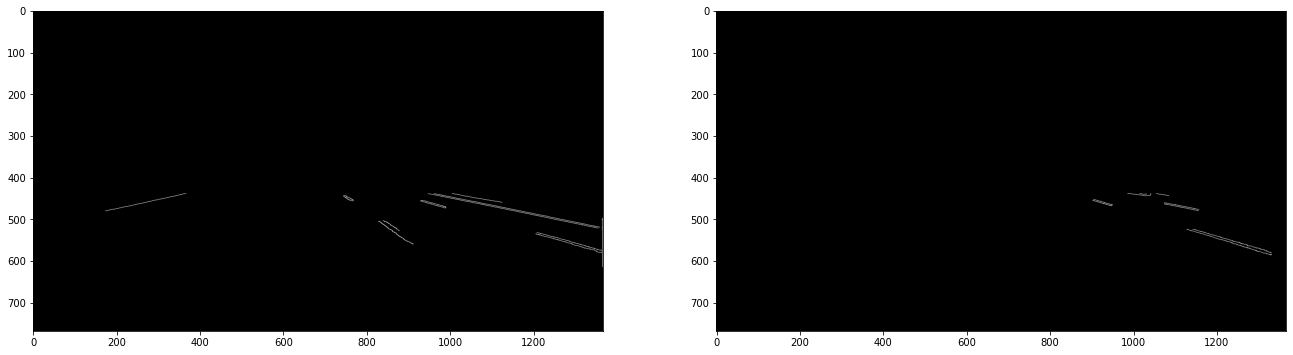

In [5]:
def region_of_interest(image):
    height = image.shape[0]
    length = image.shape[1]
    print(height)
    inf = round((4/7)*height)
    sup = round((4/5)*height)
    polygons = np.array([
        [(0,inf),(length,inf),(length,sup),(0,sup)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

cropped_image = region_of_interest(canny);
cropped_image2 = region_of_interest(canny2);

plt.figure(4)
plt.subplot(1,2,1),plt.imshow(cropped_image,'gray')
plt.subplot(1,2,2),plt.imshow(cropped_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

<class 'numpy.ndarray'>


c:\users\difao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys


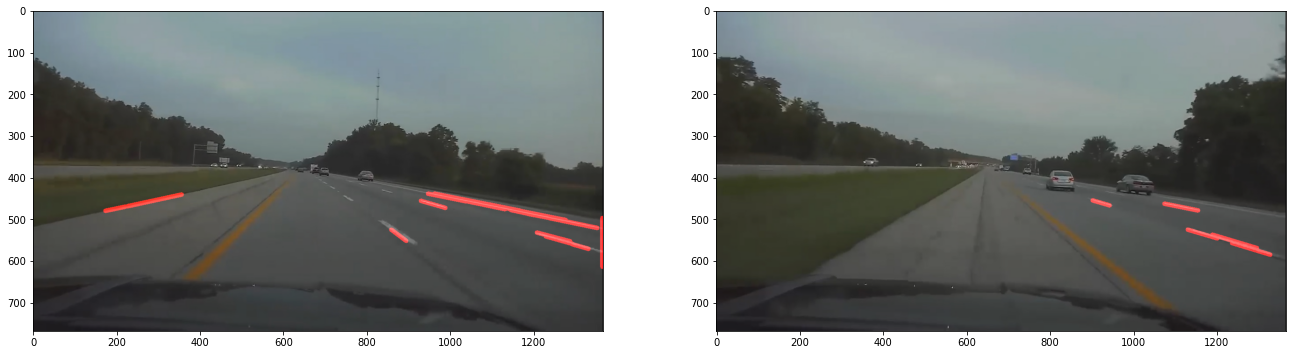

In [6]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    angle = 10
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                cv2.line(line_image, (x1, y1), (x2, y2), (255,0,0), 10)
    return line_image

    
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
print(type(lines))
lines2 = cv2.HoughLinesP(cropped_image2, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)
line_image = display_lines(lane_image, lines)
line_image2 = display_lines(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

                 line  1
theta  11.231766384024441
[[1135  474 1276  502]]
0.19858156028368795
248
1843 614 962 439
                 line  2
theta  11.70643672915333
[[1020  453 1131  476]]
0.2072072072072072
241
1800 614 956 439
                 line  3
theta  -11.768288932020647
[[173 480 221 470]]
-0.20833333333333334
516
-470 614 370 439
                 line  4
theta  15.708637829015746
[[1228  541 1292  559]]
0.28125
195
1490 614 868 439
                 line  5
theta  11.458752345877201
[[1094  465 1168  480]]
0.20270270270270271
243
1830 614 967 439
                 line  6
theta  10.619655276155134
[[1185  487 1233  496]]
0.1875
264
1867 614 933 439
                 line  7
theta  14.708303899682747
[[1207  532 1287  553]]
0.2625
215
1520 614 853 439
                 line  8
theta  16.073574164746393
[[929 456 988 473]]
0.288135593220339
188
1478 614 871 439
                 line  9
theta  11.689369175439191
[[1236  497 1352  521]]
0.20689655172413793
241
1803 614 957 439
    

c:\users\difao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in int_scalars
  if __name__ == '__main__':


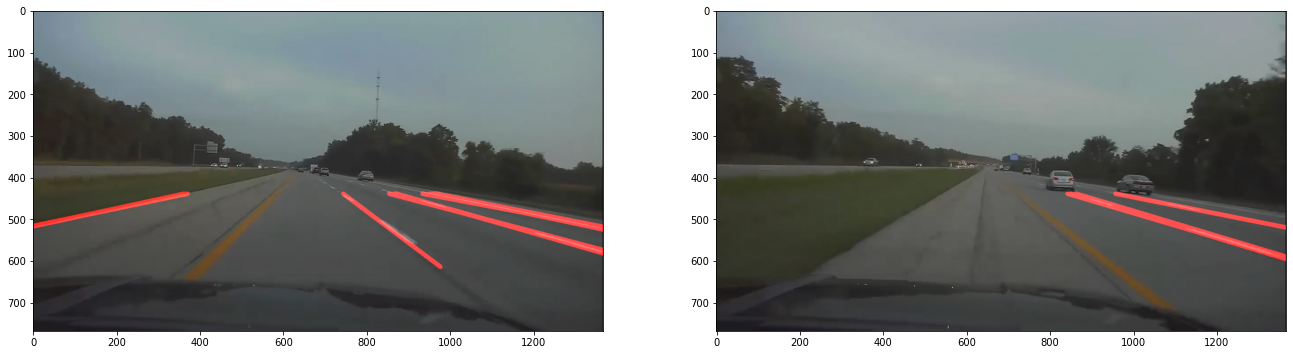

In [10]:
def display_lines_large(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if (theta>angle or theta<-angle)and(x1!=x2):
                n = n+1
                print("                 line ",n)
                print('theta ', theta)
                print(line)
                slope = ((y2-y1)/(x2-x1))
                print(slope)
                intercept = int(y1-slope*x1)
                print(intercept)
                y1_new = round((4/5)*height)
                y2_new = round((4/7)*height)
                if(slope==0):
                    x1_new = x1
                    x2_new = x2
                else:
                    x1_new = round((y1_new-intercept)/slope)
                    x2_new = round((y2_new-intercept)/slope)
                print(x1_new, y1_new, x2_new, y2_new)    
                cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (255,0,0), 10)
    return line_image

line_image = display_lines_large(lane_image, lines)
line_image2 = display_lines_large(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

In [8]:
def display_lines_prom(image, lines):
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    param = []
    new_lines = []
    slope_error = 30
    intercept_error = 30
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if theta>angle or theta<-angle:
                if(x1!=x2):
                    slope = ((y2-y1)/(x2-x1))
                    intercept = int(y1-slope*x1)
                    param.append((slope,intercept))
    print(param)
    if param is not None:
        new_lines.append(param[0])
        for line in param:
            print("line")
            print(line)
            slope = line[0]
            intercept = line[1]
            new_lines2 = new_lines
            i=0
            for new_line in new_lines2:
                print("new_line")
                print(new_line)
                max_slope = new_line[0]+abs(new_line[0])*slope_error/100
                min_slope = new_line[0]-abs(new_line[0])*slope_error/100
                max_intercept = new_line[1]+abs(new_line[1])*intercept_error/100
                min_intercept = new_line[1]-abs(new_line[1])*intercept_error/100
                print("limits")
                print(min_slope, max_slope, min_intercept, max_intercept)
                if ((slope<max_slope)&(slope>min_slope)&(intercept<max_intercept)&(intercept>min_intercept)):
                    print("si")
                    found = True
                    new_slope = (slope+new_line[0])/2
                    new_intercept = (intercept+new_line[1])/2
                    new_line = (new_slope, new_intercept)
                    new_lines[i]=new_line
                    break
                else:
                    print("no")
                    found = False
                i=i+1
            if not found:
                new_lines.append(line)
                
    print("new_lines")
    print(new_lines)
    for line in new_lines:
        slope = line[0]
        intercept = line[1]
        y1_new = round((4/5)*height)
        y2_new = round((3/5)*height) 
        x1_new = round((y1_new-intercept)/slope)
        x2_new = round((y2_new-intercept)/slope)        
        cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), (0,0,255), 10)
    return line_image

line_image = display_lines_prom(lane_image, lines)
print("______________________________________________________")
line_image2 = display_lines_prom(lane_image2, lines2)

#plt.figure(5)
#plt.subplot(1,2,1),plt.imshow(line_image,'gray')
#plt.subplot(1,2,2),plt.imshow(line_image2,'gray')
#plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
mixed_image2 = cv2.addWeighted(lane_image2, 0.8, line_image2, 1, 1)

plt.figure(6)
plt.subplot(1,2,1),plt.imshow(mixed_image,'gray')
plt.subplot(1,2,2),plt.imshow(mixed_image2,'gray')
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

c:\users\difao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in int_scalars
  del sys.path[0]
c:\users\difao\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in int_scalars
  from ipykernel import kernelapp as app


OverflowError: cannot convert float infinity to integer

In [ ]:
plt.figure(6)
plt.subplot(2,1,1),plt.imshow(image2)
plt.subplot(2,1,2),plt.imshow(mixed_image2)
plt.subplots_adjust(top=4, bottom=1, left=1, right=5, hspace=0.1, wspace=0.2)

Próximo por hacer
* Probar con las imágenes del video
* Intentar hacer el filtro de color como en el de la primera entrega para las líneas amarillas
* Pasarlo a hacer con video